## Notes:

* We definitely not want to cache any segments that are used only once.
* We should rank-order segments by how frequently they occur.

In [1]:
%matplotlib inline
import collections

import numpy as np
import pandas as pd

from hetmech.degree_weight import categorize, get_segments, get_all_segments, order_segments
from hetmech.hetmat import HetMat

In [2]:
hetmat = HetMat('../data/hetionet-v1.0.hetmat/')

In [3]:
metapaths = hetmat.metagraph.extract_all_metapaths(max_length=5)

## Get all segments

When splitting a metapath like `CrCbGaDrDaG`, which will be split more than once, I think it is helpful to include intermediate splits. This is because, in light of our desire to cache, we would like to cache the results of larger computations if they are reused. By counting this way, we will discover if there are frequently-repeated longer segments that would otherwise be sub-split. 

Basically:

`CrCbGaDrDaG` -> [`CrC`, `CbG`, `GaDrDaG`] -> [`CrC`, `CbG`, **`GaDrDaG`**, `GaD`, `DrD`, `DaG`]

instead of 

`CrCbGaDrDaG` -> [`CrC`, `CbG`, `GaDrDaG`] -> [`CrC`, `CbG`, `GaD`, `DrD`, `DaG`]

In [4]:
%%time
segments_to_cache = order_segments(hetmat.metagraph, metapaths)

CPU times: user 1min 1s, sys: 15.2 ms, total: 1min 1s
Wall time: 1min 1s


In [5]:
segments_to_cache.most_common(10)

[(GaD, 62653),
 (GdD, 62653),
 (GuD, 62653),
 (GbC, 60118),
 (GuC, 60118),
 (GdC, 60118),
 (GdA, 40542),
 (GeA, 40542),
 (GuA, 40542),
 (Gr>G, 34768)]

In [6]:
len(segments_to_cache)

15562

In [7]:
len([v for v in segments_to_cache.values() if v > 100])

405

In [8]:
len([v for v in segments_to_cache.values() if v > 500])

126

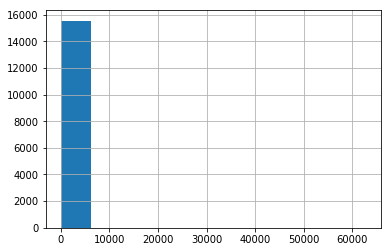

In [9]:
pd.Series(list(segments_to_cache.values())).hist()

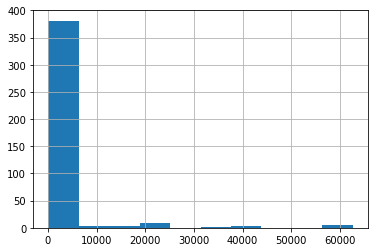

In [10]:
pd.Series([v for v in segments_to_cache.values() if v > 100]).hist()

In [11]:
segments = pd.DataFrame.from_dict(segments_to_cache, orient='index').sort_values(by=0, ascending=False)

In [12]:
num_calls = segments.sum()[0]

arr = []

for num_cached in range(len(segments_to_cache)):
    cached_values = np.sum(segments[0].iloc[0:num_cached].values) / num_calls
    arr.append([num_cached, cached_values])

calls = pd.DataFrame(arr)

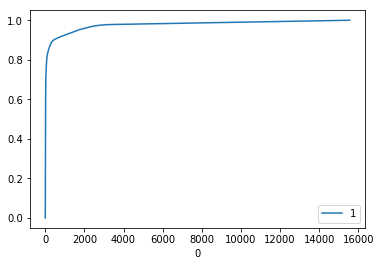

In [13]:
calls.plot(x=0, y=1)